<a href="https://colab.research.google.com/github/PeKkaPie95/selfProjectsAndAttempts/blob/main/animalClassifier.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import tensorflow as tf
from tensorflow.keras import layers, models
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import os
import cv2
import zipfile
from sklearn.model_selection import train_test_split

In [ ]:
# Unzip the data
with zipfile.ZipFile("/content/animal_data.zip", 'r') as zip_ref:
    zip_ref.extractall("/content/animal_data")  # extract to /content/animal_data

# Update data_dir to point to the extracted directory
data_dir = "/content/animal_data/animal_data"

class_names = sorted(os.listdir(data_dir))  # maintain consistent order
class_map = {name: idx for idx, name in enumerate(class_names)}
print("Class Mapping: ", class_map)

images = []
labels = []

# iterate through each folder and read images
for class_name, class_idx in class_map.items():
    class_path = os.path.join(data_dir, class_name)
    for img_file in os.listdir(class_path):
        img_path = os.path.join(class_path, img_file)
        # read and resize image
        img = cv2.imread(img_path)
        if img is not None:
            img = cv2.resize(img, (224, 224))
            images.append(img)
            labels.append(class_idx)


Class Mapping:  {'Bear': 0, 'Bird': 1, 'Cat': 2, 'Cow': 3, 'Deer': 4, 'Dog': 5, 'Dolphin': 6, 'Elephant': 7, 'Giraffe': 8, 'Horse': 9, 'Kangaroo': 10, 'Lion': 11, 'Panda': 12, 'Tiger': 13, 'Zebra': 14}


In [ ]:
images = np.array(images, dtype="float32") / 255.0  # normalize pixel values to [0, 1]
labels = np.array(labels, dtype="int")
print(f"Loaded {len(images)} images with shape {images.shape}")

X_train, X_test, y_train, y_test = train_test_split(
    images, labels, test_size=0.2, random_state=42, stratify=labels
)

# further spliting the training set into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(
    X_train, y_train, test_size=0.1, random_state=42, stratify=y_train
)

print(f"Training set: {len(X_train)} samples")
print(f"Validation set: {len(X_val)} samples")
print(f"Testing set: {len(X_test)} samples")

Loaded 1944 images with shape (1944, 224, 224, 3)
Training set: 1399 samples
Validation set: 156 samples
Testing set: 389 samples


In [ ]:
model = tf.keras.Sequential([
    tf.keras.Input(shape=(224, 224, 3)),
    tf.keras.layers.Conv2D(32, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D((2, 2)),
    tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D((2, 2)),
    tf.keras.layers.Conv2D(128, (3, 3), activation='relu'),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(len(class_names), activation='softmax')  # output layer with softmax for probability
])

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

Epoch 1/10
44/44 ━━━━━━━━━━━━━━━━━━━━ 205s 5s/step - accuracy: 0.0934 - loss: 2.9389 - val_accuracy: 0.2628 - val_loss: 2.3141
Epoch 2/10
44/44 ━━━━━━━━━━━━━━━━━━━━ 253s 4s/step - accuracy: 0.3695 - loss: 2.0281 - val_accuracy: 0.3590 - val_loss: 1.9185
Epoch 3/10
44/44 ━━━━━━━━━━━━━━━━━━━━ 201s 4s/step - accuracy: 0.6093 - loss: 1.3434 - val_accuracy: 0.6026 - val_loss: 1.5967
Epoch 4/10
44/44 ━━━━━━━━━━━━━━━━━━━━ 206s 4s/step - accuracy: 0.8146 - loss: 0.7159 - val_accuracy: 0.6346 - val_loss: 1.7316
Epoch 5/10
44/44 ━━━━━━━━━━━━━━━━━━━━ 195s 4s/step - accuracy: 0.9174 - loss: 0.3328 - val_accuracy: 0.6538 - val_loss: 1.6698
Epoch 6/10
44/44 ━━━━━━━━━━━━━━━━━━━━ 203s 4s/step - accuracy: 0.9546 - loss: 0.1716 - val_accuracy: 0.6410 - val_loss: 2.3228
Epoch 7/10
44/44 ━━━━━━━━━━━━━━━━━━━━ 203s 4s/step - accuracy: 0.9779 - loss: 0.1336 - val_accuracy: 0.6923 - val_loss: 2.3255
Epoch 8/10
44/44 ━━━━━━━━━━━━━━━━━━━━ 213s 5s/step - accuracy: 0.9563 - loss: 0.3920 - val_accuracy: 0.7500 - v

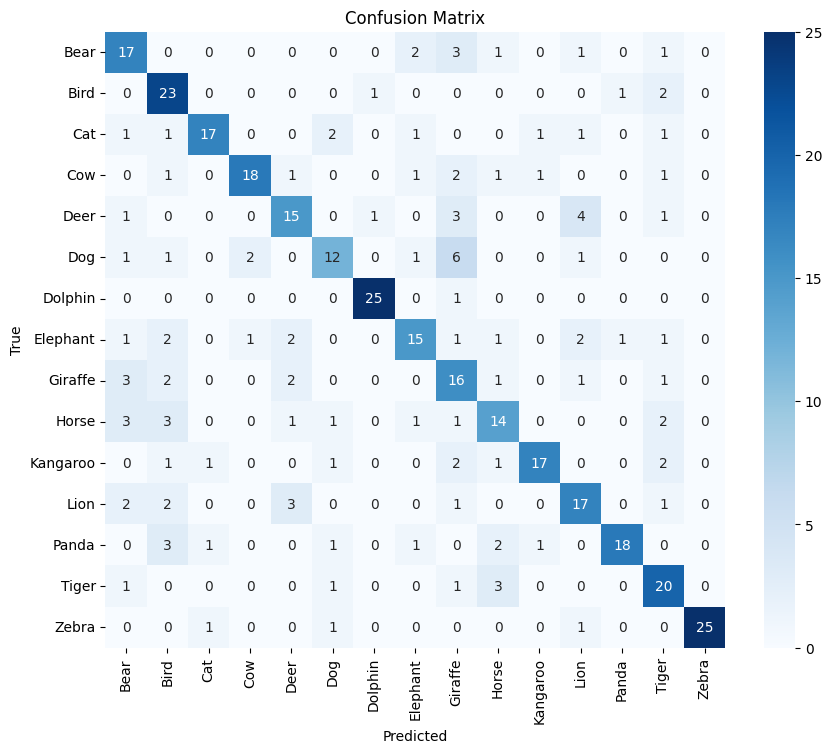

In [ ]:
history = model.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=10, batch_size=32)

y_pred_probs = model.predict(X_test)
y_pred = np.argmax(y_pred_probs, axis=1)

correct_predictions = sum(y_pred[i] == y_test[i] for i in range(len(y_test)))
manual_accuracy = correct_predictions / len(y_test)
print(f"Manual Accuracy: {manual_accuracy:.2f}")

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=class_names, yticklabels=class_names)
plt.xlabel("Predicted")
plt.ylabel("True")
plt.title("Confusion Matrix")
plt.show()

In [ ]:
# predicting for a single image
img_path = "/content/animal_data/animal_data/Bear/Bear_10_3.jpg" # enter path of image
img = cv2.imread(img_path)
img_resized = cv2.resize(img, (224, 224))
img_normalized = img_resized / 255.0
img_expanded = np.expand_dims(img_normalized, axis=0)

# predicted probabilities
single_pred_probs = model.predict(img_expanded)[0]
class_probabilities = {class_name: prob for class_name, prob in zip(class_names, single_pred_probs)}
sorted_probabilities = dict(sorted(class_probabilities.items(), key=lambda item: item[1], reverse=True))

print("Class Probabilities:")
for class_name, prob in sorted_probabilities.items():
    print(f"{class_name}: {prob:.4f}")


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 185ms/step
Class Probabilities:
Bear: 0.9883
Lion: 0.0042
Deer: 0.0026
Cow: 0.0017
Tiger: 0.0012
Giraffe: 0.0007
Elephant: 0.0004
Kangaroo: 0.0003
Horse: 0.0002
Bird: 0.0002
Dog: 0.0001
Cat: 0.0000
Zebra: 0.0000
Panda: 0.0000
Dolphin: 0.0000
